In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from datetime import timedelta

In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error


In [86]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Datasets/AirQualityUCI.xlsx')
df.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1 2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2 2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3 2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4 2004-03-10  22:00:00     1.6      1272.25        51   6.518224   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   
2         939.25    131.0       1140.00    114.0       1554.50      1074.00   
3         948.25    172.0       1092.00    122.0       1583.75      1203.25   
4         835.50    131.0       1205.00    116.0       1490.00      1110.00   

       T         RH        AH  
0  13.60  48.875001  0.757754  
1  13.30  47.700000  0.725487  
2  11.90  53.975000  0.750239  
3  11.00  60.000000  0.786713  
4  11.15  59.575001  0.788794

In [87]:
df.shape

(9357, 15)

In [88]:
df.tail()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
9352 2005-04-04  10:00:00     3.1      1314.25      -200  13.529605   
9353 2005-04-04  11:00:00     2.4      1162.50      -200  11.355157   
9354 2005-04-04  12:00:00     2.4      1142.00      -200  12.374538   
9355 2005-04-04  13:00:00     2.1      1002.50      -200   9.547187   
9356 2005-04-04  14:00:00     2.2      1070.75      -200  11.932060   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
9352        1101.25    471.7        538.50    189.8       1374.25   
9353        1027.00    353.3        603.75    179.2       1263.50   
9354        1062.50    293.0        603.25    174.7       1240.75   
9355         960.50    234.5        701.50    155.7       1041.00   
9356        1047.25    265.2        654.00    167.7       1128.50   

      PT08.S5(O3)       T      RH        AH  
9352      1728.50  21.850  29.250  0.756824  
9353      1269.00  24.325  23.725  0.711864  
9354      1092.00  26.900  18.350  0.640649  
9355       769.75  28.325  13.550  0.513866  
9356       816.00  28.500  13.125  0.502804

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [90]:
df['Time'].dtypes

dtype('O')

In [91]:
df['DateTime'] = df['Date'].astype('str') + ' ' + df['Time'].astype('str')
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['Month'] = df['Date'].dt.month
df['Hour'] = df['Time'].astype('str').apply(lambda x: int(x.split(':')[0]))

In [92]:
# df.drop(['Date', 'Time'], axis=1, inplace=True)
df.set_index('DateTime', inplace=True)

In [94]:
df.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  \
DateTime                                                                  
2004-03-10 18:00:00 2004-03-10  18:00:00     2.6      1360.00       150   
2004-03-10 19:00:00 2004-03-10  19:00:00     2.0      1292.25       112   
2004-03-10 20:00:00 2004-03-10  20:00:00     2.2      1402.00        88   
2004-03-10 21:00:00 2004-03-10  21:00:00     2.2      1375.50        80   
2004-03-10 22:00:00 2004-03-10  22:00:00     1.6      1272.25        51   

                      C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  \
DateTime                                                                        
2004-03-10 18:00:00  11.881723        1045.50    166.0       1056.25    113.0   
2004-03-10 19:00:00   9.397165         954.75    103.0       1173.75     92.0   
2004-03-10 20:00:00   8.997817         939.25    131.0       1140.00    114.0   
2004-03-10 21:00:00   9.228796         948.25    172.0       1092.00    122.0   
2004-03-10 22:00:00   6.518224         835.50    131.0       1205.00    116.0   

                     PT08.S4(NO2)  PT08.S5(O3)      T         RH        AH  \
DateTime                                                                     
2004-03-10 18:00:00       1692.00      1267.50  13.60  48.875001  0.757754   
2004-03-10 19:00:00       1558.75       972.25  13.30  47.700000  0.725487   
2004-03-10 20:00:00       1554.50      1074.00  11.90  53.975000  0.750239   
2004-03-10 21:00:00       1583.75      1203.25  11.00  60.000000  0.786713   
2004-03-10 22:00:00       1490.00      1110.00  11.15  59.575001  0.788794   

                     Month  Hour  
DateTime                          
2004-03-10 18:00:00      3    18  
2004-03-10 19:00:00      3    19  
2004-03-10 20:00:00      3    20  
2004-03-10 21:00:00      3    21  
2004-03-10 22:00:00      3    22

In [95]:
df.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
Month            0
Hour             0
dtype: int64

In [96]:
df.eq(-200).sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
Month               0
Hour                0
dtype: int64

In [97]:
# search for -200 value in the dataframe and highlight those values by yellow color
# df[df.eq(-200).any(1)].style.applymap(lambda x:'background-color: yellow' if x==-200 else '')

 More than 90% of observations in column `NMHC(GT)` has missing values so it would be good idea to drop the column rather than treating the missing values in it. 

In [149]:
df.drop('NMHC(GT)', axis=1, inplace=True)

In [150]:
df.replace(-200, np.nan, inplace=True)

In [151]:
df.eq(-200).sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
Month            0
Hour             0
Week Day         0
dtype: int64

In [152]:
df.isna().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
Month               0
Hour                0
Week Day            0
dtype: int64

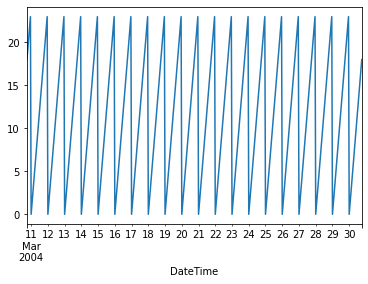

In [153]:
df['Hour']['2004-03-10 18:00:00' : '2004-03-30 18:00:00'].plot()

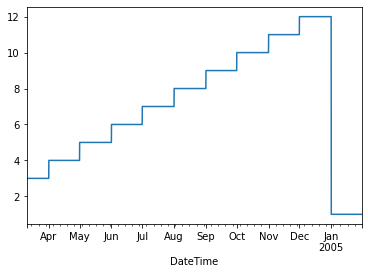

In [99]:
df['Month']['2004-03-10 18:00:00' : '2005-01-30 18:00:00'].plot()

In [21]:
# df[df.isna().any(1)]

In [22]:
!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


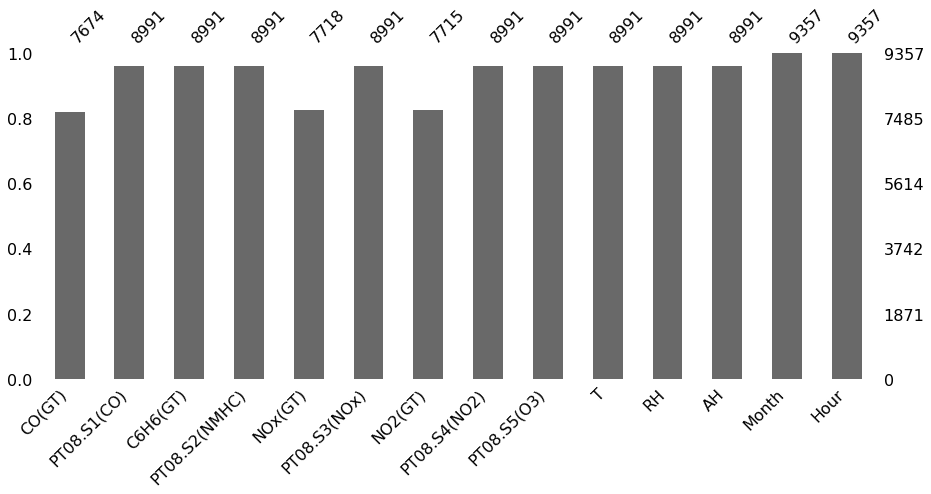

In [23]:
import missingno as msno

# visualize data of each columns ignoring the missing values in the dataset
msno.bar(df, figsize=(15,6))

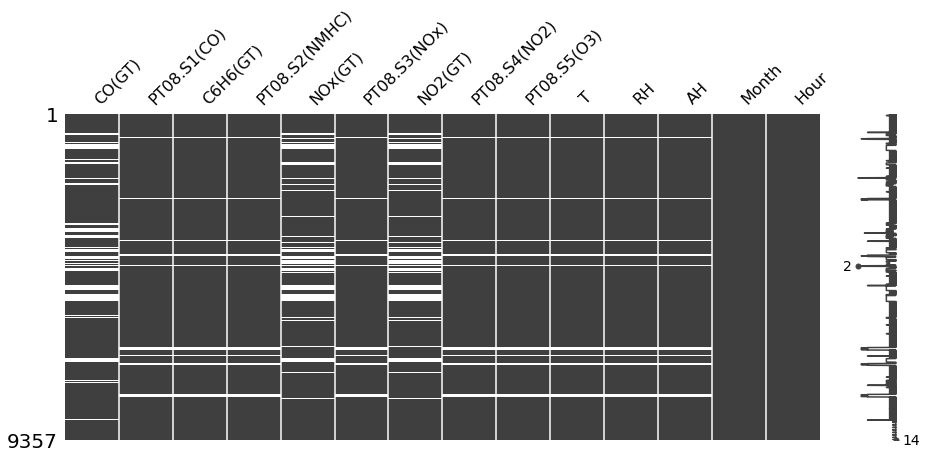

In [24]:
# visualize the distribution of missing data across different columns, if they're evenly spread?
msno.matrix(df, figsize=(15,6))

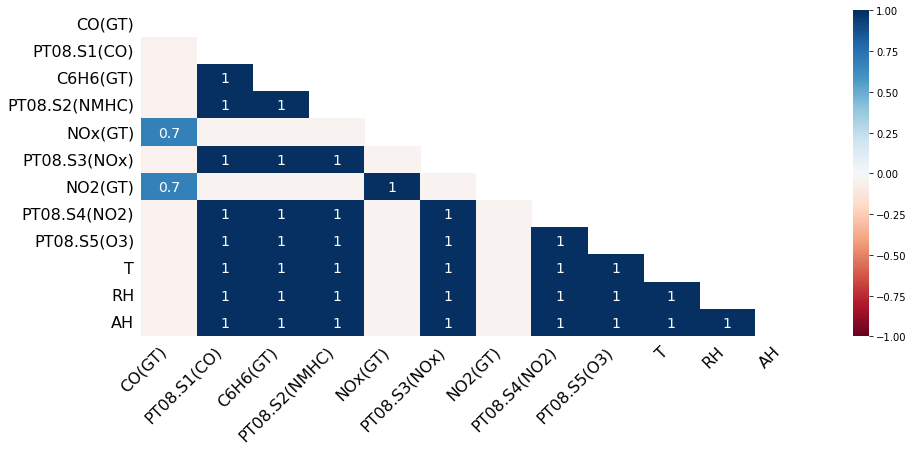

In [25]:
msno.heatmap(df, figsize=(15,6))

We can see from above heatmap that NOx(GT) and NO2(GT) has a correlatio of 1 which means if the value from one column is missing then the value in another column will be missing as well. The correlation of CO(GT) with NOx(GT) and NO2(GT) is 0.7 which depicts the similar missing value correlation.

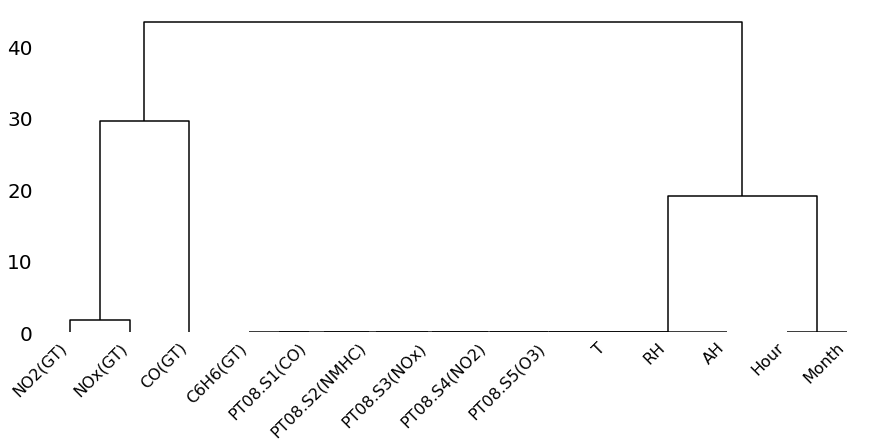

In [26]:
msno.dendrogram(df, orientation='top', figsize=(15,6))

In [27]:
# keeping a copy of dataset with missing values
data = df

In [28]:
# replacing missing values using linear interpolation
for col in df.columns[0:12]:
  df[col] = df[col].interpolate()


In [29]:
df.isna().sum()

CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
Month            0
Hour             0
dtype: int64

Now the data has no missing values.

In [30]:
df.describe()

CO(GT)  PT08.S1(CO)     C6H6(GT)  PT08.S2(NMHC)      NOx(GT)  \
count  9357.000000  9357.000000  9357.000000    9357.000000  9357.000000   
mean      2.130603  1102.932925    10.178838     942.019562   241.908464   
std       1.431736   218.201561     7.503295     267.864854   204.308147   
min       0.100000   647.250000     0.149048     383.250000     2.000000   
25%       1.100000   937.500000     4.477145     736.000000    96.000000   
50%       1.800000  1066.750000     8.289085     910.333333   180.000000   
75%       2.900000  1238.750000    14.096486    1119.000000   326.000000   
max      11.900000  2039.750000    63.741476    2214.000000  1479.000000   

       PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)            T  \
count   9357.000000  9357.000000   9357.000000  9357.000000  9357.000000   
mean     832.634930   109.620033   1453.172887  1032.422456    18.231754   
std      255.708807    46.451523    343.201361   404.442611     8.782368   
min      322.000000     2.000000    551.000000   221.000000    -1.900000   
25%      654.000000    76.000000   1227.000000   733.250000    11.725000   
50%      803.500000   104.827586   1459.500000   970.000000    17.575000   
75%      967.500000   136.400000   1668.250000  1293.000000    24.275001   
max     2682.750000   339.700000   2775.000000  2522.750000    44.600000   

                RH           AH        Month         Hour  
count  9357.000000  9357.000000  9357.000000  9357.000000  
mean     49.189157     1.019621     6.310356    11.498557  
std      17.194081     0.402203     3.438160     6.923182  
min       9.175000     0.184679     1.000000     0.000000  
25%      35.800000     0.732280     3.000000     5.000000  
50%      49.650000     0.989504     6.000000    11.000000  
75%      62.250002     1.306671     9.000000    18.000000  
max      88.725000     2.231036    12.000000    23.000000

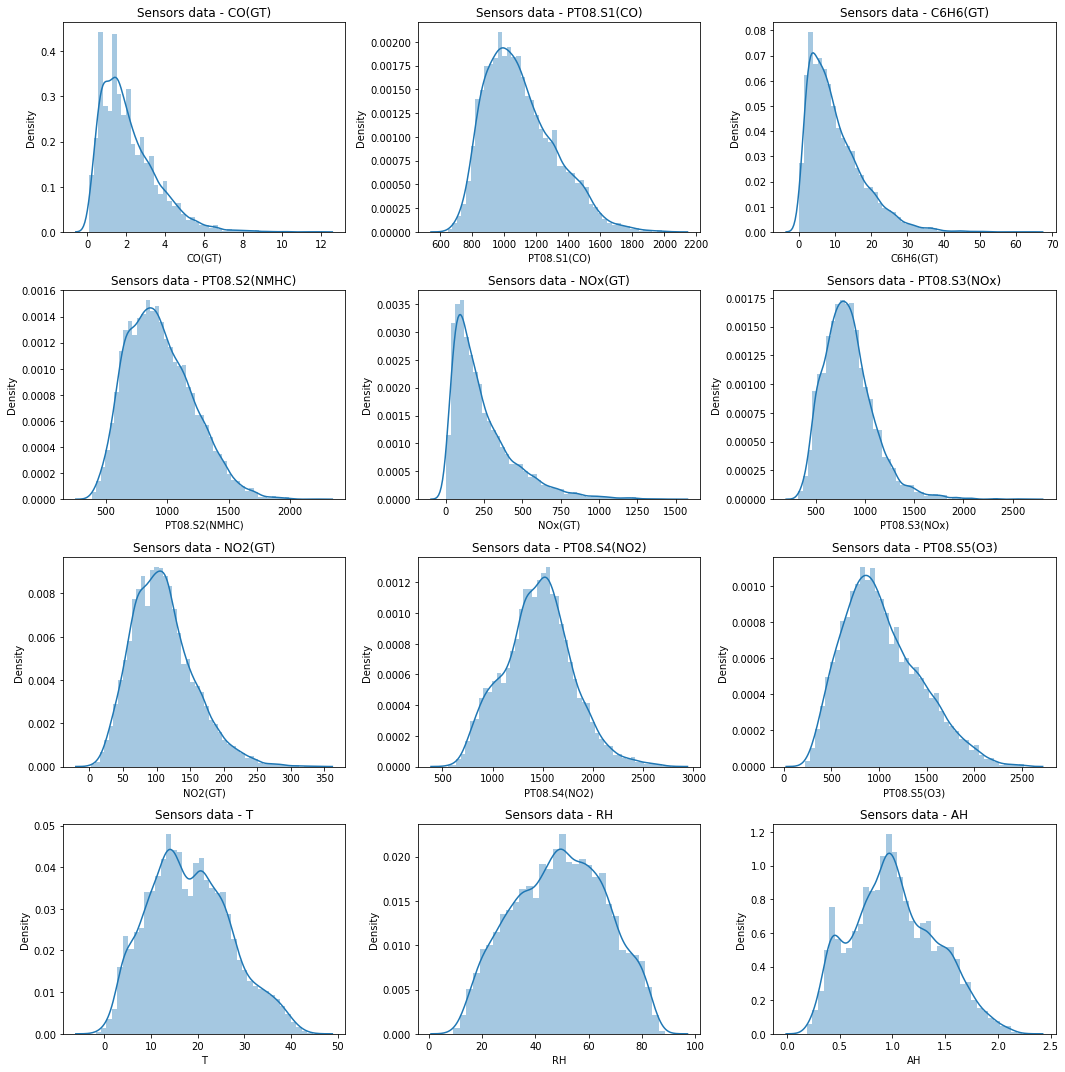

In [31]:
plt.figure(figsize = (15, 15))
plotnumber = 1

for col in df.columns[0:12]:
    if plotnumber <= (len(df.columns)-1):
        ax = plt.subplot(4, 3, plotnumber)
        sns.distplot(df[col]) 
        plt.title('Sensors data - {}'.format(col))

        
    plotnumber += 1

plt.tight_layout()
plt.show()

### Before replacing missing values

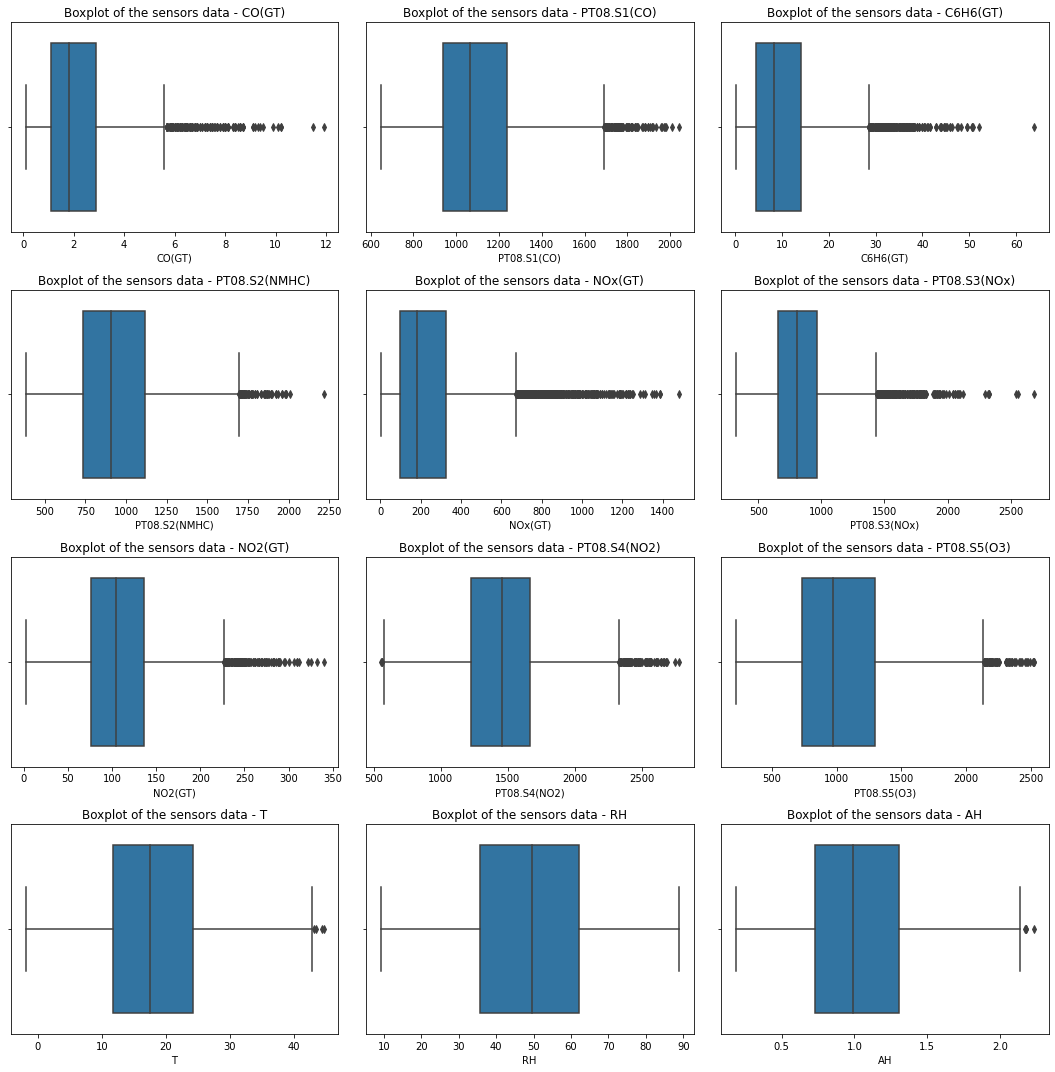

In [32]:
plt.figure(figsize = (15, 15))
plotnumber = 1

for col in data.columns[0:12]:
    if plotnumber <= (len(data.columns)-1):
        ax = plt.subplot(4, 3, plotnumber)
        sns.boxplot(data[col]) 
        plt.title('Boxplot of the sensors data - {}'.format(col))

        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [33]:
for col in data.columns[0:12]:
  Q1 = data[col].quantile(0.25)
  Q3 = data[col].quantile(0.75)
  IQR = Q3 - Q1
  upper_limit = Q3 + 1.5 * IQR
  lower_limit = Q1 - 1.5 * IQR
  
  print('Total number of outliers in column {} is:'.format(col), ((data[col] < lower_limit) | (data[col] > upper_limit)).sum())
  
  # print('Total number of outliers in column {} is:'.format(col), ((df[col] < lower_limit) | (df[col] > upper_limit)).sum())

Total number of outliers in column CO(GT) is: 224
Total number of outliers in column PT08.S1(CO) is: 103
Total number of outliers in column C6H6(GT) is: 243
Total number of outliers in column PT08.S2(NMHC) is: 64
Total number of outliers in column NOx(GT) is: 432
Total number of outliers in column PT08.S3(NOx) is: 240
Total number of outliers in column NO2(GT) is: 159
Total number of outliers in column PT08.S4(NO2) is: 108
Total number of outliers in column PT08.S5(O3) is: 71
Total number of outliers in column T is: 4
Total number of outliers in column RH is: 0
Total number of outliers in column AH is: 4


### After replacing missing values

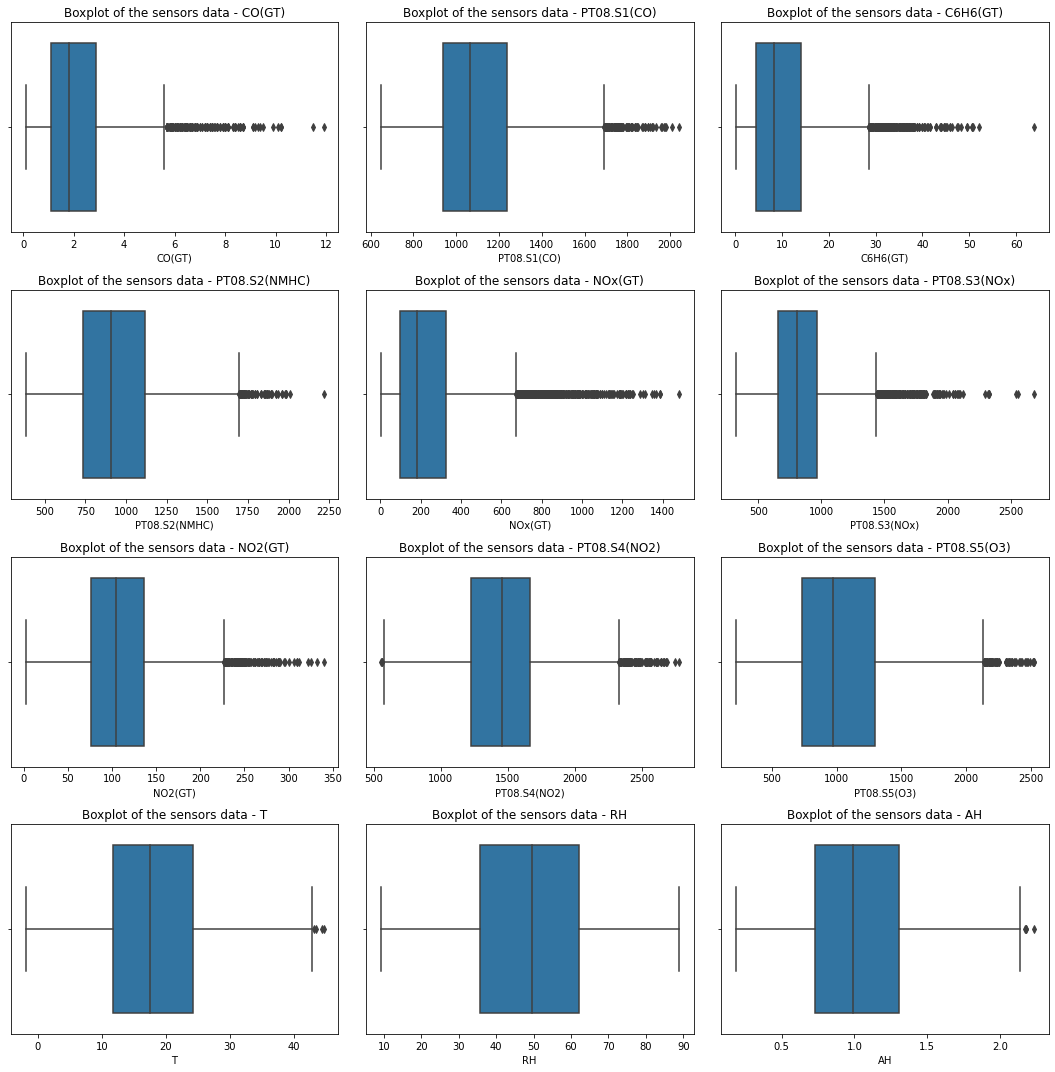

In [34]:
plt.figure(figsize = (15, 15))
plotnumber = 1

for col in df.columns[0:12]:
    if plotnumber <= (len(df.columns)-1):
        ax = plt.subplot(4, 3, plotnumber)
        sns.boxplot(df[col]) 
        plt.title('Boxplot of the sensors data - {}'.format(col))

        
    plotnumber += 1

plt.tight_layout()
plt.show()

There is no difference on before and after missing values plot, it means the values replace with missing values are not behaving as an outliers.

In [35]:
# ! pip install plotly==3.10.0

In [36]:
# import plotly.graph_objs as go

Lower limit of CO(GT): -1.600, Upper limit: 5.600
Lower limit of PT08.S1(CO): 485.625, Upper limit: 1690.625
Lower limit of C6H6(GT): -9.952, Upper limit: 28.525
Lower limit of PT08.S2(NMHC): 161.500, Upper limit: 1693.500
Lower limit of NOx(GT): -249.000, Upper limit: 671.000
Lower limit of PT08.S3(NOx): 183.750, Upper limit: 1437.750
Lower limit of NO2(GT): -14.600, Upper limit: 227.000
Lower limit of PT08.S4(NO2): 565.125, Upper limit: 2330.125
Lower limit of PT08.S5(O3): -106.375, Upper limit: 2132.625
Lower limit of T: -7.100, Upper limit: 43.100
Lower limit of RH: -3.875, Upper limit: 101.925
Lower limit of AH: -0.129, Upper limit: 2.168


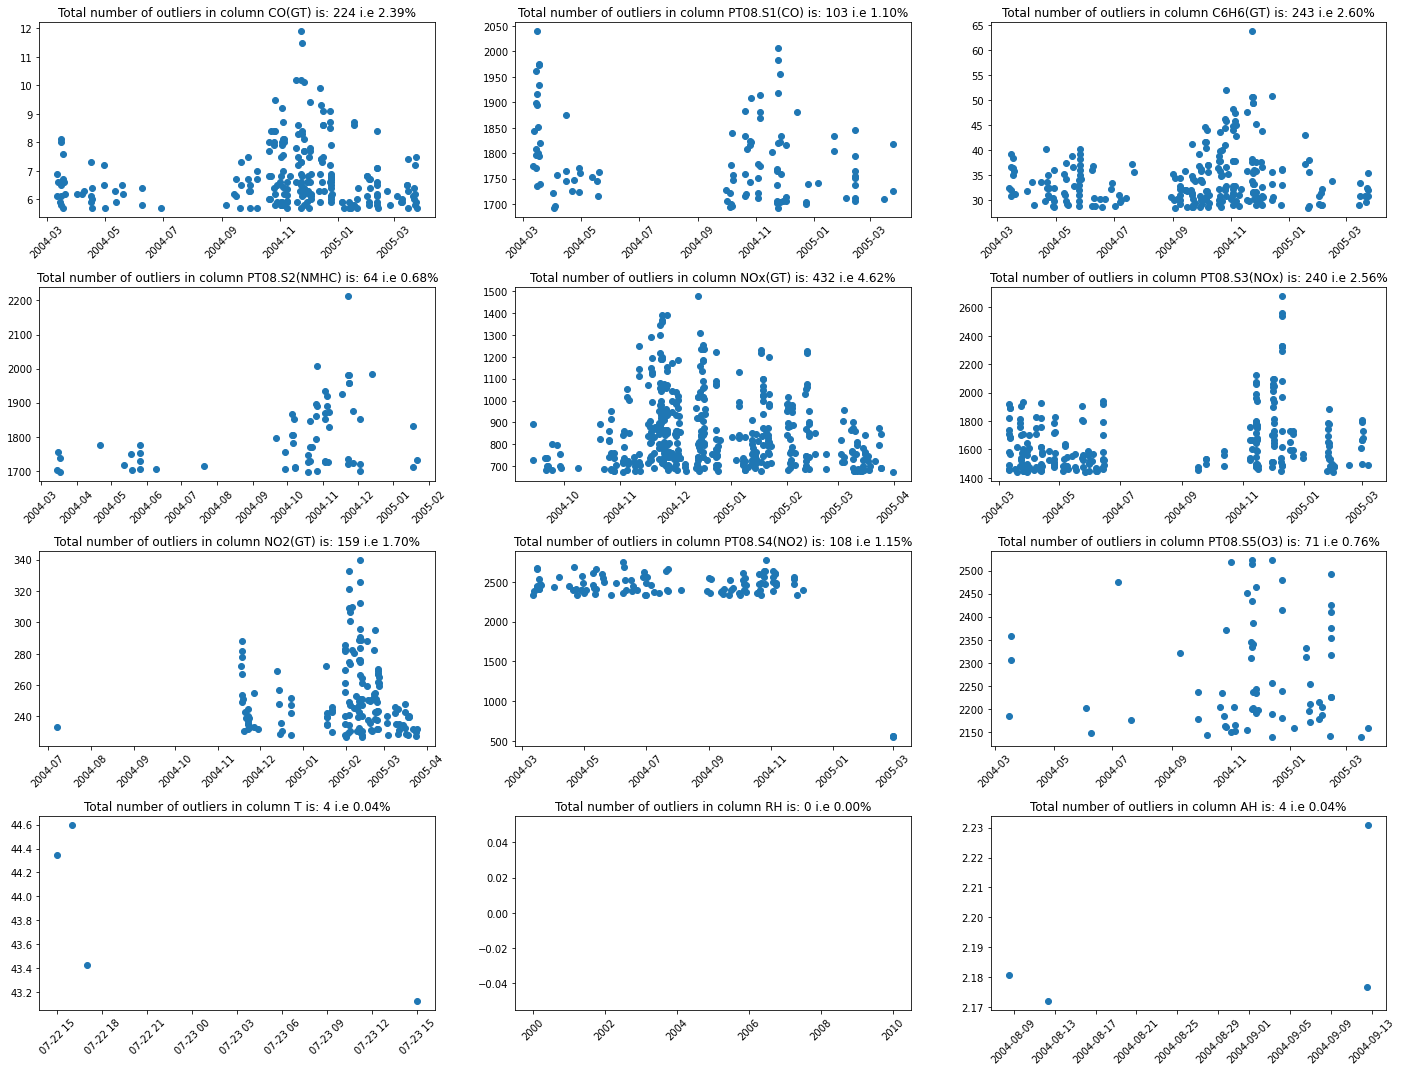

In [37]:
# visualizing the outliers of each features of the dataset
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in df.columns[0:12]:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  upper_limit = Q3 + 1.5 * IQR
  lower_limit = Q1 - 1.5 * IQR
  print('Lower limit of {}: %.3f, Upper limit: %.3f'.format(col) %(lower_limit, upper_limit))
  if plotnumber <= (len(df.columns[0:13])-1):
    ax = plt.subplot(4, 3, plotnumber)
    outliers = df[(df[col] > upper_limit) | (df[col] < lower_limit)]
    # go.Scatter(x=outliers[col].index, y=outliers[col])
    plt.scatter(x= outliers[col].index, y=outliers[col])
    plt.title('Total number of outliers in column {} is: {} i.e %.2f%%'.format(col, outliers.shape[0]) %(outliers.shape[0]/df.shape[0] * 100))
    plt.xticks(rotation=45)
    plt.xlabel('')
  plotnumber += 1
plt.tight_layout()
plt.show()

# print('Total number of outliers in column {} is:'.format(col), df[(df[col] > upper_limit) | (df[col] < lower_limit)].shape[0])
 

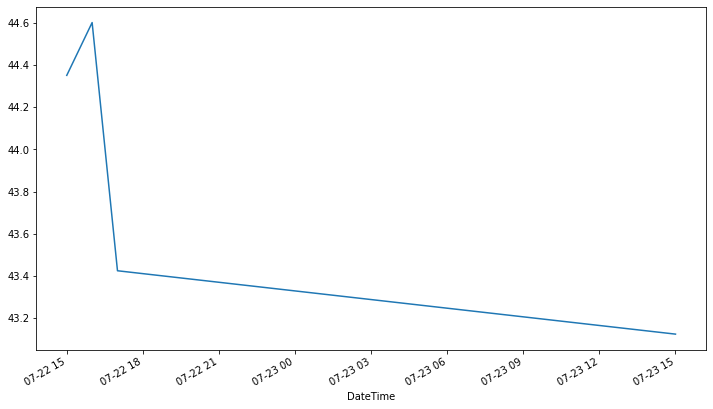

In [38]:
df[(df['T'] > 43.10000157356299) | (df['T'] < -7.100001096724997)]['T'].plot(figsize=(12,7))

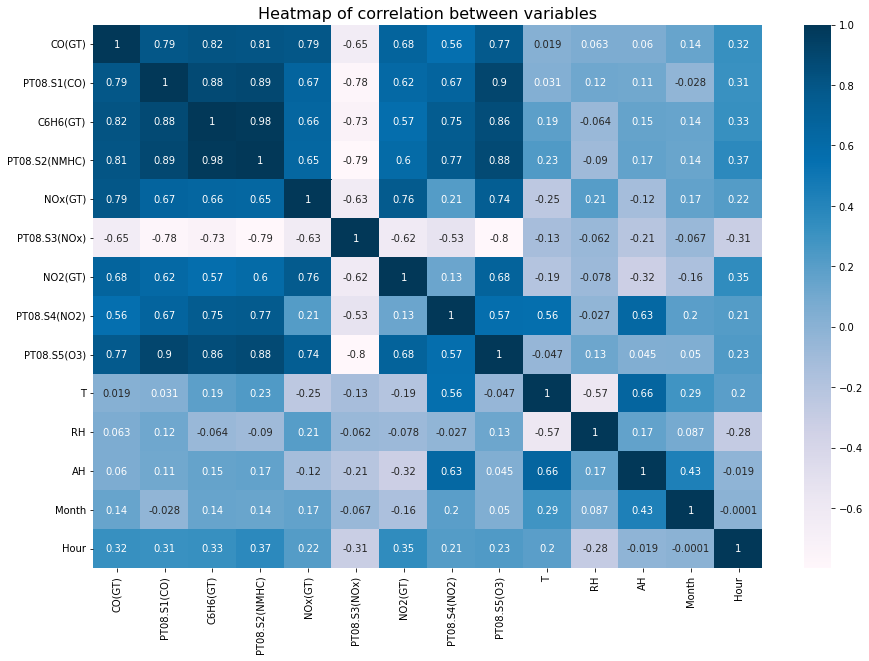

In [39]:
plt.figure(figsize = (15,10))
ax = sns.heatmap(df.corr(), annot=True, cmap='PuBu')
plt.title('Heatmap of correlation between variables', fontsize=16)
plt.show()

`C6H6(GT)` and `PTO8.S2(NMHC)` has the correlation of `0.98` so one of these two features can be dropped out.

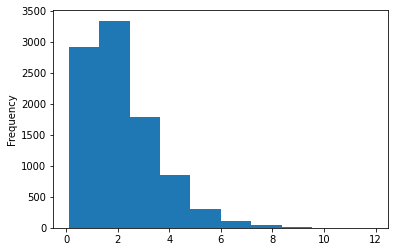

In [40]:
#carbon monoxide has high corelation with almost all attributes, so let's use it as a target feature
df['CO(GT)'].plot(kind='hist')

Let's understand the degree of linearity between `CO(GT)` and rest of the other attributes.

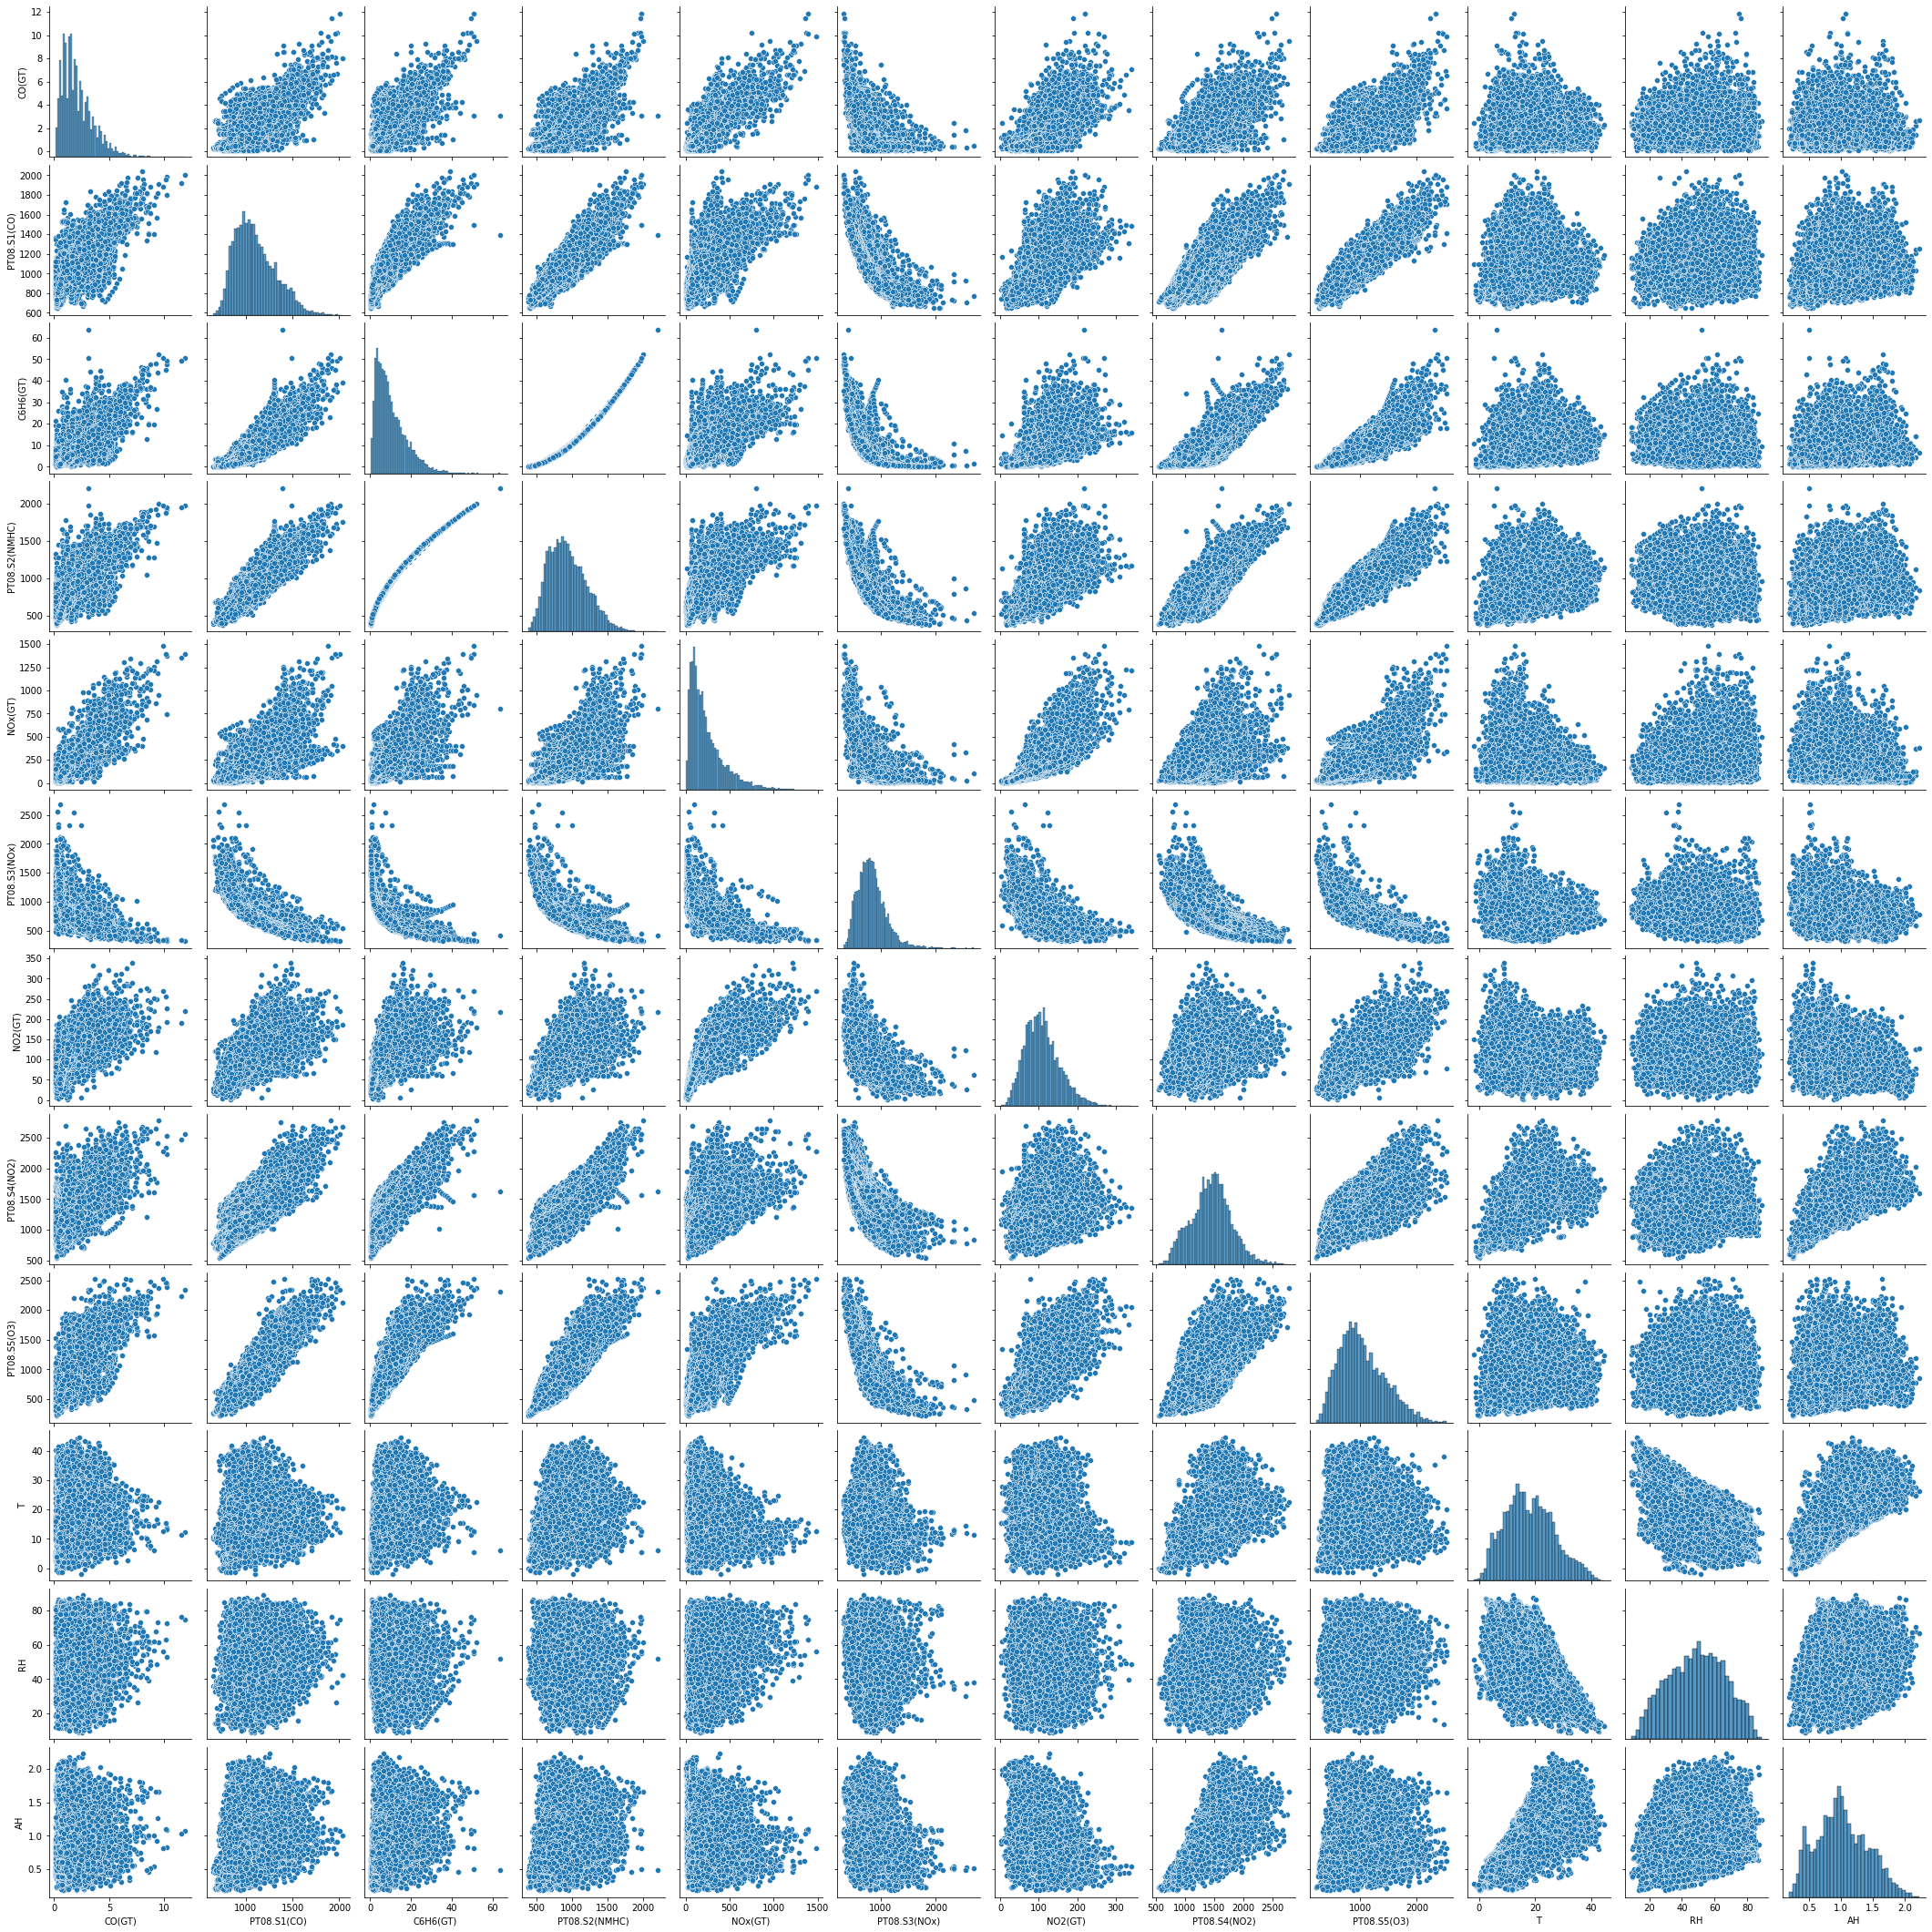

In [84]:
sns.pairplot(df[df.columns[0:12]])

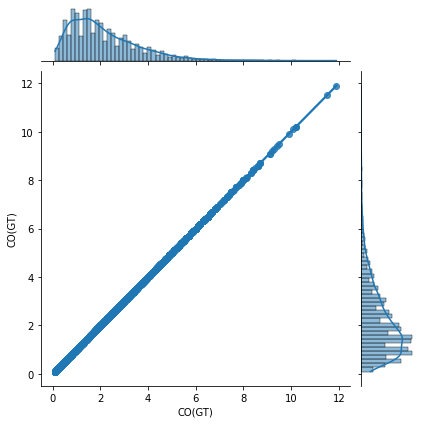

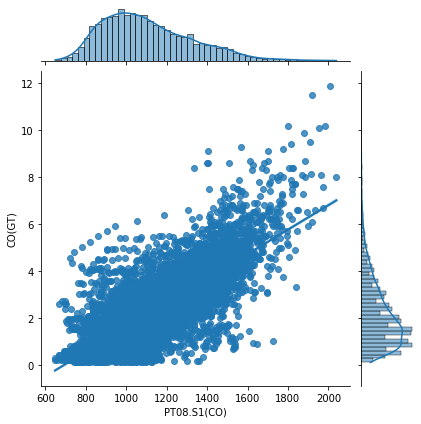

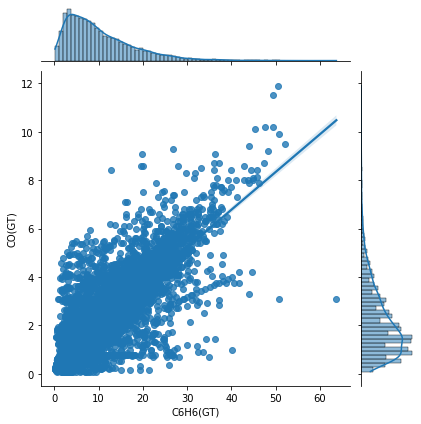

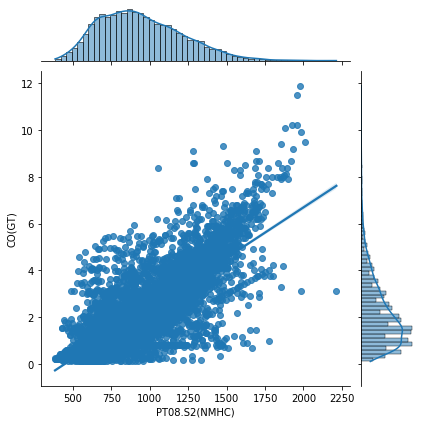

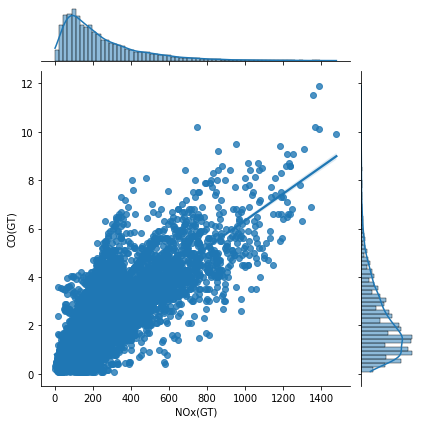

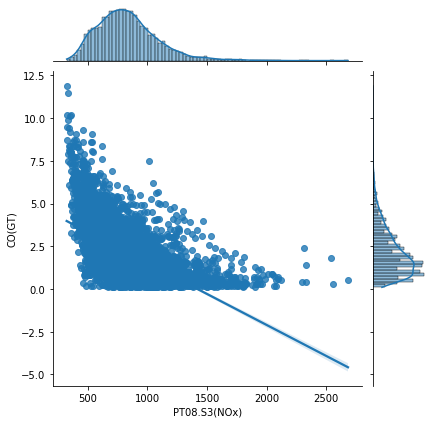

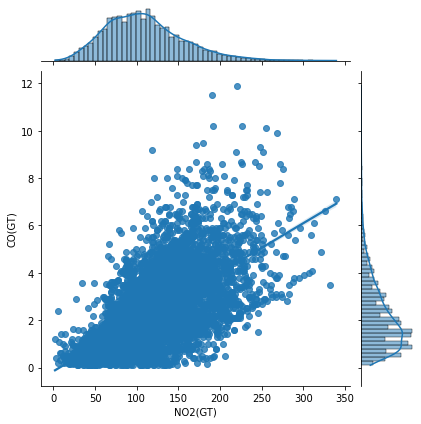

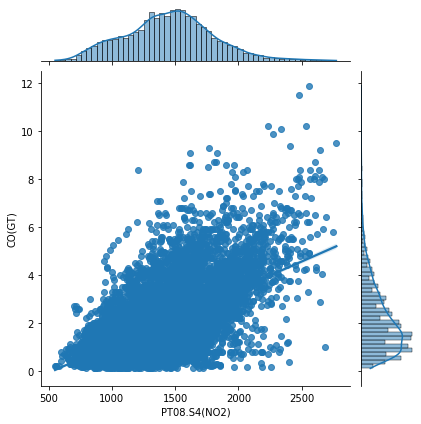

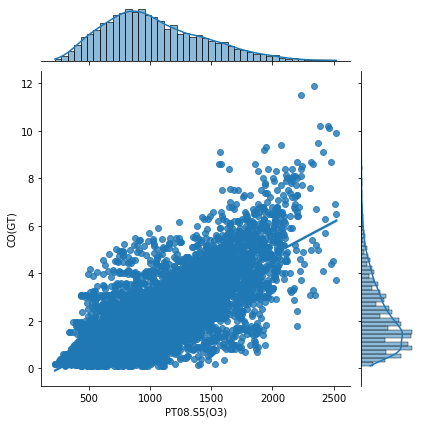

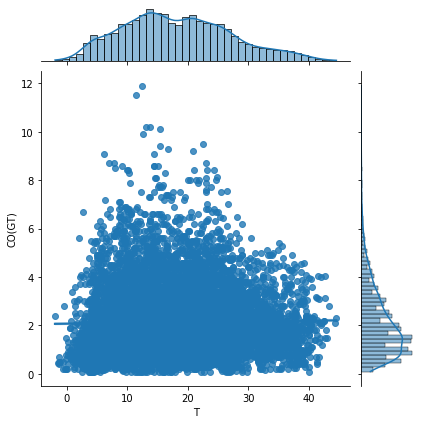

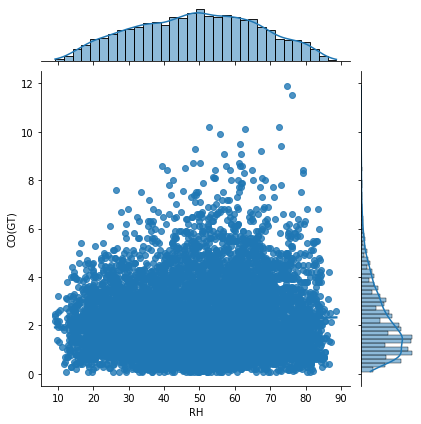

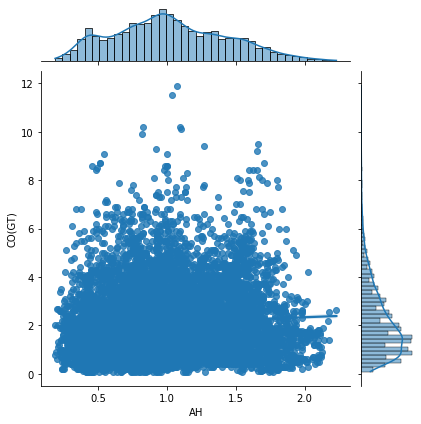

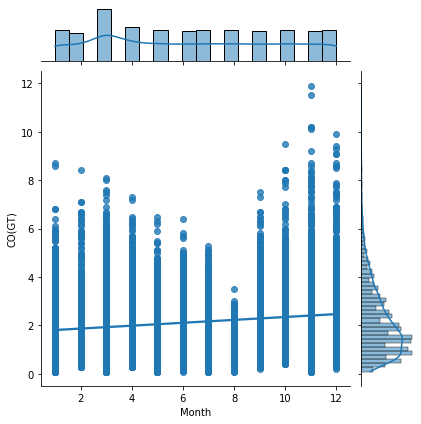

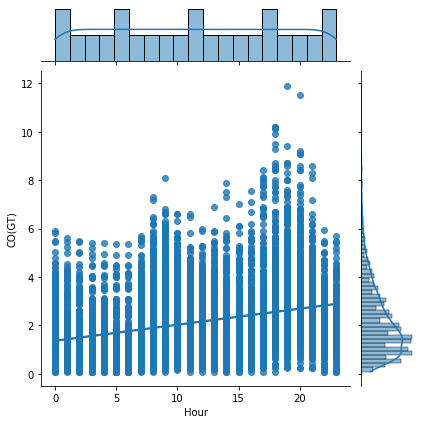

In [41]:
for i in df.columns:
  sns.jointplot(x=i, y='CO(GT)', data=df, kind='reg')

In [154]:
# adding a column week day
df['Week Day'] = df['Date'].dt.day_name()

In [155]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH', 'Month', 'Hour', 'Week Day'],
      dtype='object')

In [156]:
cols = df.columns.tolist()[:2] + df.columns.tolist()[-1:] + df.columns.tolist()[-3:-1] + df.columns.tolist()[2:15]
df_weekday = df[cols]
df_weekday.head() 

Date      Time   Week Day  Month  Hour  CO(GT)  \
DateTime                                                                   
2004-03-10 18:00:00 2004-03-10  18:00:00  Wednesday      3    18     2.6   
2004-03-10 19:00:00 2004-03-10  19:00:00  Wednesday      3    19     2.0   
2004-03-10 20:00:00 2004-03-10  20:00:00  Wednesday      3    20     2.2   
2004-03-10 21:00:00 2004-03-10  21:00:00  Wednesday      3    21     2.2   
2004-03-10 22:00:00 2004-03-10  22:00:00  Wednesday      3    22     1.6   

                     PT08.S1(CO)   C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
DateTime                                                              
2004-03-10 18:00:00      1360.00  11.881723        1045.50    166.0   
2004-03-10 19:00:00      1292.25   9.397165         954.75    103.0   
2004-03-10 20:00:00      1402.00   8.997817         939.25    131.0   
2004-03-10 21:00:00      1375.50   9.228796         948.25    172.0   
2004-03-10 22:00:00      1272.25   6.518224         835.50    131.0   

                     PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)      T  \
DateTime                                                                       
2004-03-10 18:00:00       1056.25    113.0       1692.00      1267.50  13.60   
2004-03-10 19:00:00       1173.75     92.0       1558.75       972.25  13.30   
2004-03-10 20:00:00       1140.00    114.0       1554.50      1074.00  11.90   
2004-03-10 21:00:00       1092.00    122.0       1583.75      1203.25  11.00   
2004-03-10 22:00:00       1205.00    116.0       1490.00      1110.00  11.15   

                            RH        AH  Month  
DateTime                                         
2004-03-10 18:00:00  48.875001  0.757754      3  
2004-03-10 19:00:00  47.700000  0.725487      3  
2004-03-10 20:00:00  53.975000  0.750239      3  
2004-03-10 21:00:00  60.000000  0.786713      3  
2004-03-10 22:00:00  59.575001  0.788794      3

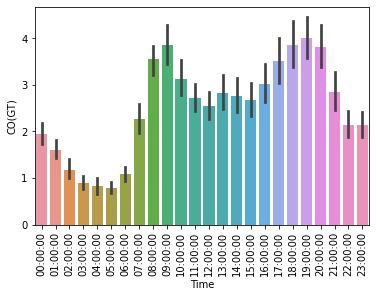

In [169]:
f = df_weekday[df_weekday['Week Day'] == 'Friday']
sns.barplot(x='Time', y='CO(GT)', data=f.sort_values('Time'))
plt.xticks(rotation=90);

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

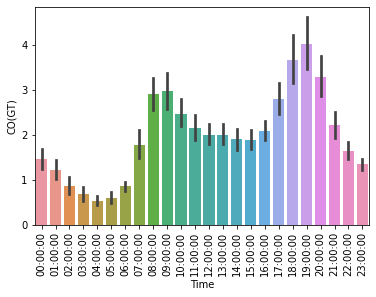

In [170]:
m= df_weekday[df_weekday['Week Day'] == 'Monday']
sns.barplot(x='Time', y='CO(GT)', data=m.sort_values('Time'))
plt.xticks(rotation=90)

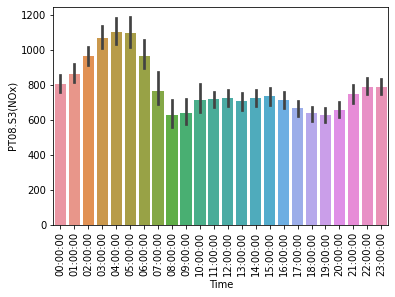

In [175]:
sns.barplot(x='Time', y='PT08.S3(NOx)', data=f.sort_values('Time'))
plt.xticks(rotation=90);

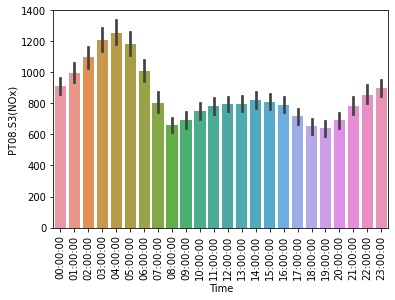

In [177]:
sns.barplot(x='Time', y='PT08.S3(NOx)', data=m.sort_values('Time'))
plt.xticks(rotation=90);

## Stationarity

In [42]:
from statsmodels.tsa.stattools import adfuller, kpss

In [43]:
def adf_test(timeseries):
    test_stat = adfuller(timeseries)
    result = pd.Series({'ADF statistic': test_stat[0],
                       'p-value': test_stat[1],
                        'Used lags': test_stat[2],
                        'Observations used': test_stat[3]})
    for key, value in test_stat[4].items():
        result['Critical value ({})'.format(key)] = value
    if test_stat[1] < 0.05:
        print("\nReject null hypothesis! Indicates that the data is stationary.")
    else:
        print("\nAccept null hypothesis! Indicates that the data is not stationary.")
    return result

def kpss_test(timeseries):
    test_stat = kpss(timeseries)
    result = pd.Series({'KPSS statistic': test_stat[0],
                       'p-value': test_stat[1],
                        'Used lags': test_stat[2]})
    for key, value in test_stat[3].items():
        result['Critical value ({})'.format(key)] = value
    if test_stat[1] < 0.05:
        print("\nReject null hypothesis! Indicates that the data is not stationary.")
    else:
        print("\nAccept null hypothesis! Indicates that the data is stationary.")
    return result

In [44]:
adf_test(df['CO(GT)'])


Reject null hypothesis! Indicates that the data is stationary.


ADF statistic          -9.872735e+00
p-value                 3.955249e-17
Used lags               3.700000e+01
Observations used       9.319000e+03
Critical value (1%)    -3.431052e+00
Critical value (5%)    -2.861850e+00
Critical value (10%)   -2.566935e+00
dtype: float64

In [45]:
kpss_test(df['CO(GT)'])


Reject null hypothesis! Indicates that the data is not stationary.


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


KPSS statistic            1.045428
p-value                   0.010000
Used lags                38.000000
Critical value (10%)      0.347000
Critical value (5%)       0.463000
Critical value (2.5%)     0.574000
Critical value (1%)       0.739000
dtype: float64

In [46]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


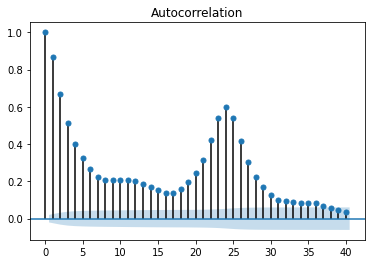

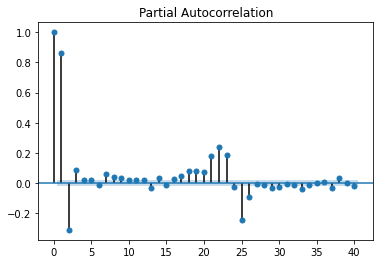

In [47]:
plot_acf(df['CO(GT)']);
plot_pacf(df['CO(GT)']);

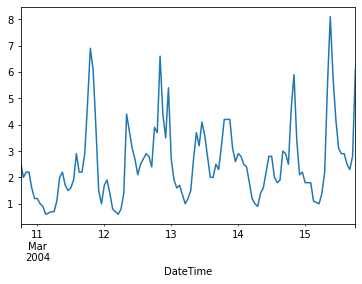

In [48]:
df['CO(GT)']['2004-03-10 18:00:00':'2004-03-15 18:00:00'].plot()

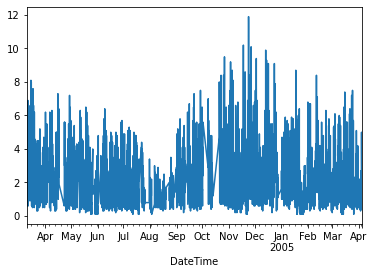

In [49]:
df['CO(GT)'].plot()

## Time Series Decomposition

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose

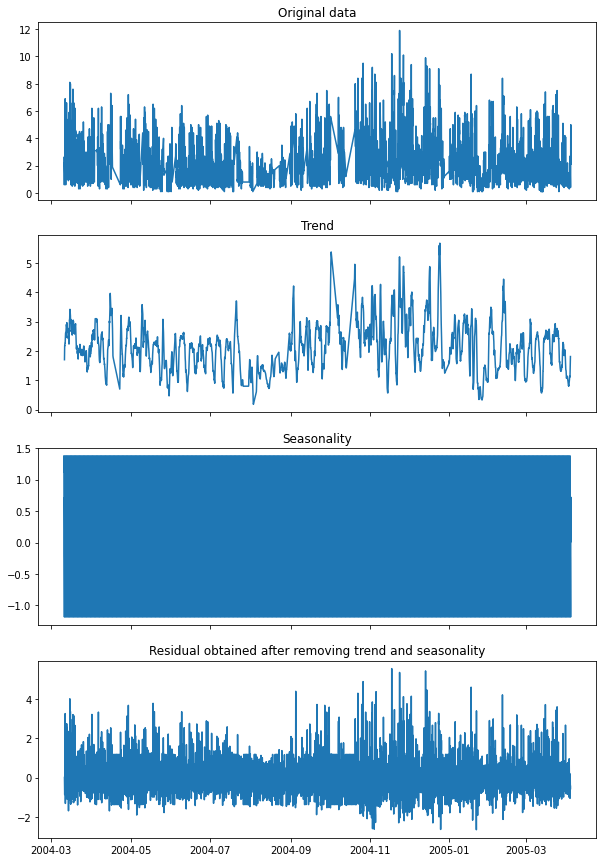

In [51]:
decomposition_result = seasonal_decompose(x=df['CO(GT)'], model='additive')
fig, ax = plt.subplots(4,1, sharex=True)
fig.set_figheight(15)
fig.set_figwidth(10)

ax[0].plot(df['CO(GT)'])
ax[0].title.set_text('Original data')

ax[1].plot(decomposition_result.trend)
ax[1].title.set_text('Trend')

ax[2].plot(decomposition_result.seasonal)
ax[2].title.set_text('Seasonality')

ax[3].plot(decomposition_result.resid)
ax[3].title.set_text('Residual obtained after removing trend and seasonality')

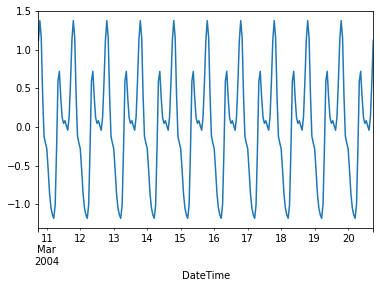

In [52]:
decomposition_result.seasonal['2004-03-10 18:00:00':'2004-03-20 18:00:00'].plot()

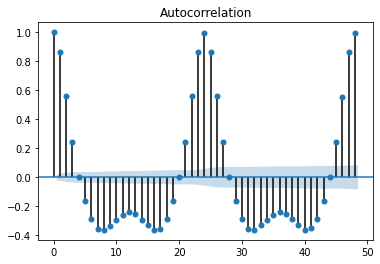

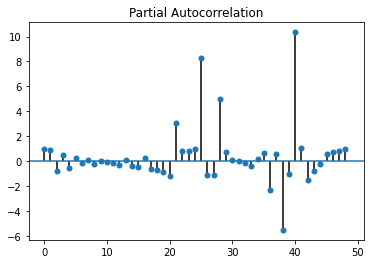

In [85]:
plot_acf(decomposition_result.seasonal, lags=48);
plot_pacf(decomposition_result.seasonal, lags=48);

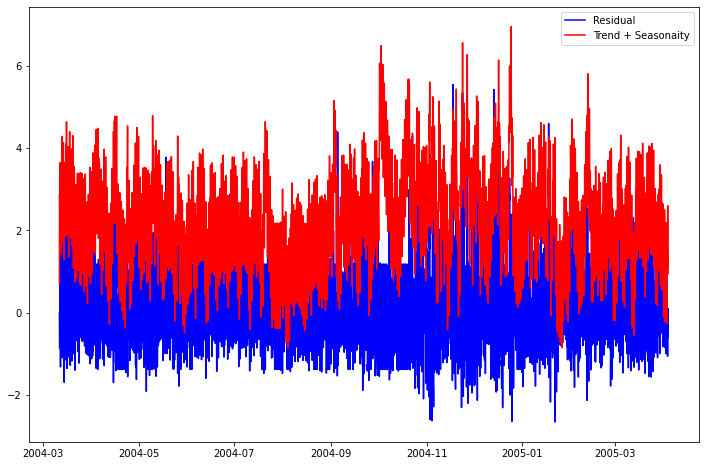

In [53]:
plt.figure(figsize=(12, 8))
plt.plot(decomposition_result.resid, color='blue')
plt.plot(decomposition_result.trend + decomposition_result.seasonal, color='red')
plt.legend(['Residual', 'Trend + Seasonaity'])

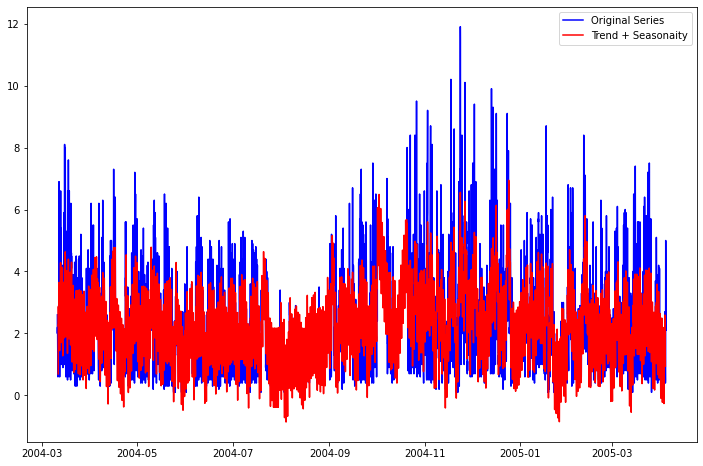

In [54]:
plt.figure(figsize=(12, 8))
# original series before decomposition
plt.plot(df['CO(GT)'], color='blue')
plt.plot(decomposition_result.trend + decomposition_result.seasonal, color='red')
plt.legend(['Original Series', 'Trend + Seasonaity'])

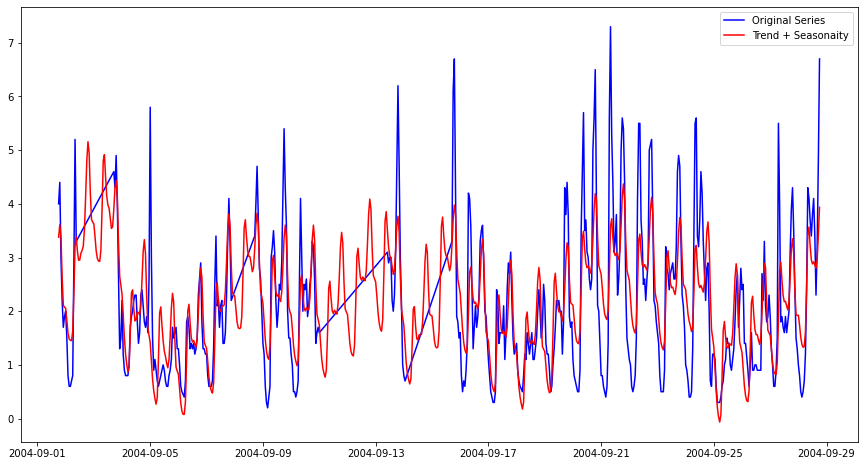

In [55]:
plt.figure(figsize=(15, 8))
# original series before decomposition
plt.plot(df['CO(GT)']['2004-09-01 18:00:00': '2004-09-28 18:00:00'], color='blue')
plt.plot(decomposition_result.trend['2004-09-01 18:00:00': '2004-09-28 18:00:00'] + decomposition_result.seasonal['2004-09-01 18:00:00': '2004-09-28 18:00:00'], color='red')
plt.legend(['Original Series', 'Trend + Seasonaity'])


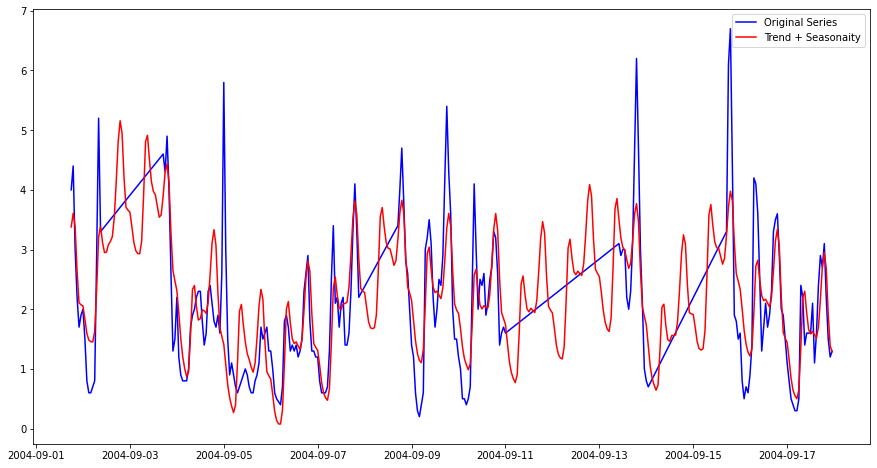

In [56]:
plt.figure(figsize=(15, 8))
# original series before decomposition
plt.plot(df['CO(GT)']['2004-09-01 18:00:00': '2004-09-17 23:00:00'], color='blue')
plt.plot(decomposition_result.trend['2004-09-01 18:00:00': '2004-09-17 23:00:00'] + decomposition_result.seasonal['2004-09-01 18:00:00': '2004-09-17 23:00:00'], color='red')
plt.legend(['Original Series', 'Trend + Seasonaity'])


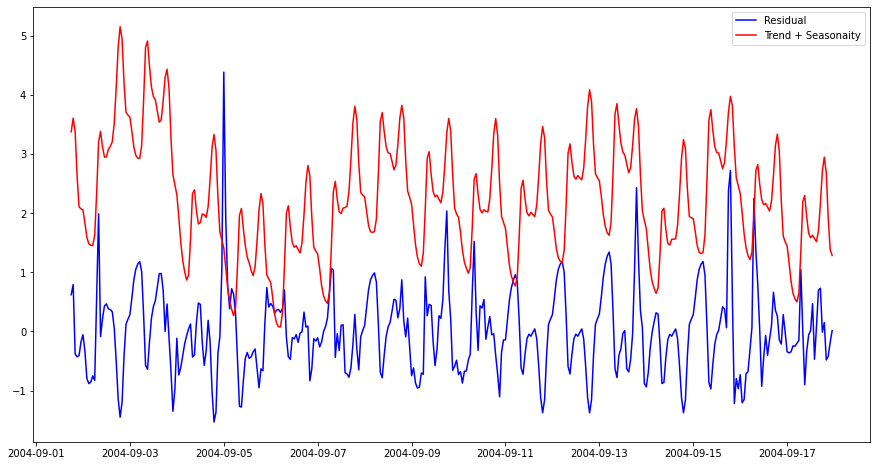

In [57]:
plt.figure(figsize=(15, 8))
# decomposed residual
plt.plot(decomposition_result.resid['2004-09-01 18:00:00': '2004-09-17 23:00:00'], color='blue')
plt.plot(decomposition_result.trend['2004-09-01 18:00:00': '2004-09-17 23:00:00'] + decomposition_result.seasonal['2004-09-01 18:00:00': '2004-09-17 23:00:00'], color='red')
plt.legend(['Residual', 'Trend + Seasonaity'])


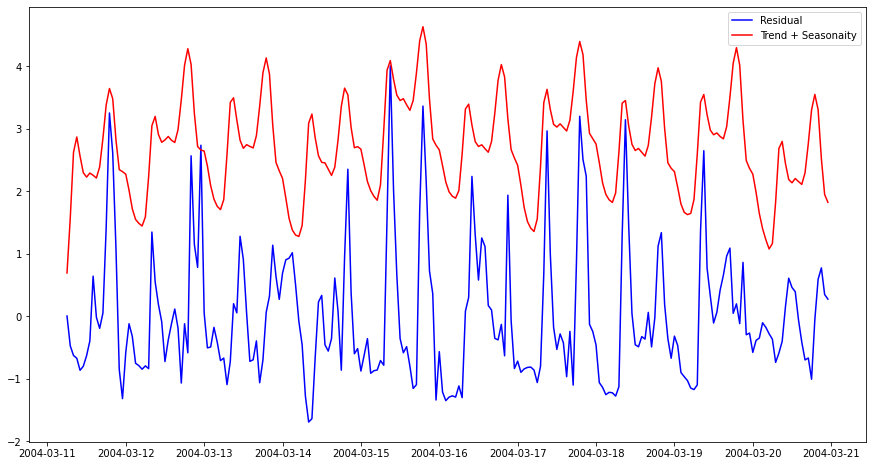

In [58]:
plt.figure(figsize=(15, 8))
# decomposed residual
plt.plot(decomposition_result.resid['2004-03-10 18:00:00': '2004-03-20 23:00:00'], color='blue')
plt.plot(decomposition_result.trend['2004-03-10 18:00:00': '2004-03-20 23:00:00'] + decomposition_result.seasonal['2004-03-10 18:00:00': '2004-03-20 23:00:00'], color='red')
plt.legend(['Residual', 'Trend + Seasonaity'])


### Detecting outliers in the residual obtained after decomposition

In [59]:
decomposition_result.resid.min(), decomposition_result.resid.max()

(-2.6537947386325484, 5.542605685285725)

In [60]:
resid_mean = decomposition_result.resid.mean()
resid_std = decomposition_result.resid.std()

lower_lm = resid_mean - 3 * resid_std
upper_lm = resid_mean + 3 * resid_std

print(lower_lm, upper_lm)

-2.5137652108342423 2.5129658672493664


(731650.75, 732040.5833333334)

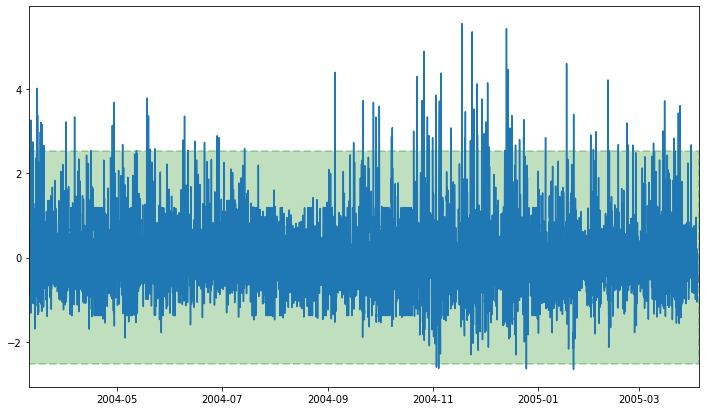

In [61]:
plt.figure(figsize=(12, 7))
plt.plot(decomposition_result.resid)

plt.fill_between([df.index.min(), df.index.max()], lower_lm, upper_lm, color='g', alpha=0.25, linestyle='--', linewidth=2)
plt.xlim(df.index.min(), df.index.max())
# plt.xlim('2004-09-01 18:00:00': '2004-09-17 23:00:00', '2004-09-01 18:00:00': '2004-09-17 23:00:00')

In [62]:
resid_outliers = df['CO(GT)'][(decomposition_result.resid < lower_lm) | (decomposition_result.resid > upper_lm)] 

In [63]:
len(resid_outliers)

125

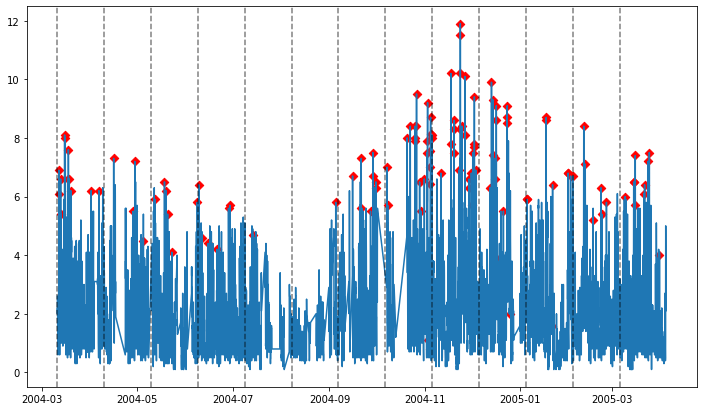

In [64]:
plt.figure(figsize=(12,7))
plt.plot(df['CO(GT)'])
start_date = df.index.min()
end_date = df.index.max()
delta = timedelta(hours=720)
while start_date <= end_date:
    plt.axvline(start_date, color='k', linestyle='--', alpha=0.5)
    start_date += delta

plt.scatter(resid_outliers.index, resid_outliers, color='r', marker='D')

In [66]:
def lagplot(x, y=None, lag=1, standardize=False, ax=None, **kwargs):
    from matplotlib.offsetbox import AnchoredText
    x_ = x.shift(lag)
    if standardize:
        x_ = (x_ - x_.mean()) / x_.std()
    if y is not None:
        y_ = (y - y.mean()) / y.std() if standardize else y
    else:
        y_ = x
    corr = y_.corr(x_)
    if ax is None:
        fig, ax = plt.subplots()
    scatter_kws = dict(
        alpha=0.75,
        s=3,
    )
    line_kws = dict(color='C3', )
    ax = sns.regplot(x=x_,
                     y=y_,
                     scatter_kws=scatter_kws,
                     line_kws=line_kws,
                     lowess=True,
                     ax=ax,
                     **kwargs)
    at = AnchoredText(
        f"{corr:.2f}",
        prop=dict(size="large"),
        frameon=True,
        loc="upper left",
    )
    at.patch.set_boxstyle("square, pad=0.0")
    ax.add_artist(at)
    ax.set(title=f"Lag {lag}", xlabel=x_.name, ylabel=y_.name)
    return ax

def plot_lags(x, y=None, lags=6, nrows=1, lagplot_kwargs={}, **kwargs):
    import math
    kwargs.setdefault('nrows', nrows)
    kwargs.setdefault('ncols', math.ceil(lags / nrows))
    kwargs.setdefault('figsize', (kwargs['ncols'] * 2, nrows * 2 + 0.5))
    fig, axs = plt.subplots(sharex=True, sharey=True, squeeze=False, **kwargs)
    for ax, k in zip(fig.get_axes(), range(kwargs['nrows'] * kwargs['ncols'])):
        if k + 1 <= lags:
            ax = lagplot(x, y, lag=k + 1, ax=ax, **lagplot_kwargs)
            ax.set_title(f"Lag {k + 1}", fontdict=dict(fontsize=14))
            ax.set(xlabel="", ylabel="")
        else:
            ax.axis('off')
    plt.setp(axs[-1, :], xlabel=x.name)
    plt.setp(axs[:, 0], ylabel=y.name if y is not None else x.name)
    fig.tight_layout(w_pad=0.1, h_pad=0.1)
    return fig

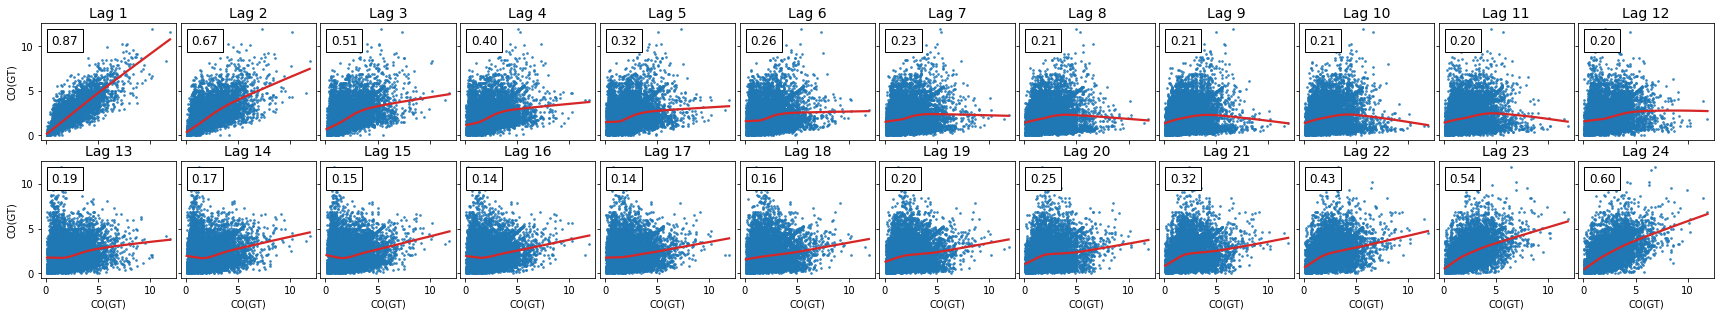

In [67]:
_ = plot_lags(df['CO(GT)'], lags=24, nrows=2)

## Persistent model

In [68]:
co_lagged_version = pd.concat([df['CO(GT)'].shift(1), df['CO(GT)']], axis=1)
co_lagged_version.columns = ['CO(GT)(t-1)', 'CO(GT)(t+1)']
co_lagged_version.head()

CO(GT)(t-1)  CO(GT)(t+1)
DateTime                                     
2004-03-10 18:00:00          NaN          2.6
2004-03-10 19:00:00          2.6          2.0
2004-03-10 20:00:00          2.0          2.2
2004-03-10 21:00:00          2.2          2.2
2004-03-10 22:00:00          2.2          1.6

In [69]:
co_lagged_version.corr()

CO(GT)(t-1)  CO(GT)(t+1)
CO(GT)(t-1)     1.000000     0.865163
CO(GT)(t+1)     0.865163     1.000000

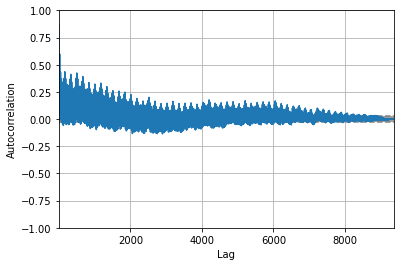

In [70]:
# plot autocorrelation plot
pd.plotting.autocorrelation_plot(df['CO(GT)']);

In [71]:
X = co_lagged_version.values
train, test = X[1:len(X)-24], X[len(X)-24:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [72]:
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((9332,), (9332,), (24,), (24,))

Test MSE: 0.666
Test RMSE: 0.816


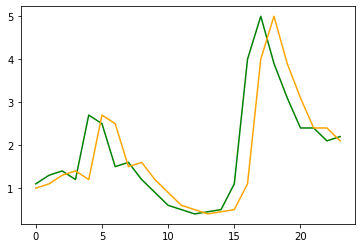

In [73]:
# persistence model
def persistence_model(x):
    return x
 
# walk-forward validation
predictions = list()
for x in test_X:
    y_pred = persistence_model(x)
    predictions.append(y_pred)
mse = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % mse)
print('Test RMSE: %.3f' % np.sqrt(mse))
# plot predictions vs expected
plt.plot(test_y, color='green')
plt.plot(predictions, color='orange')
plt.show()

## Linear Regression

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [75]:
X = df.drop('CO(GT)', axis=1)
y = df['CO(GT)']

In [76]:
scaler= StandardScaler()
x = scaler.fit_transform(X)

In [77]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, shuffle=False, random_state=0)

In [78]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7017, 13), (2340, 13), (7017,), (2340,))

In [79]:
lr = LinearRegression()
lr = lr.fit(X_train, y_train)

In [80]:
y_pred = lr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE on test set: %.3f' %rmse)

train_pred = lr.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
print('RMSE on train set: %.3f' %train_rmse)

RMSE on test set: 0.796
RMSE on train set: 0.599


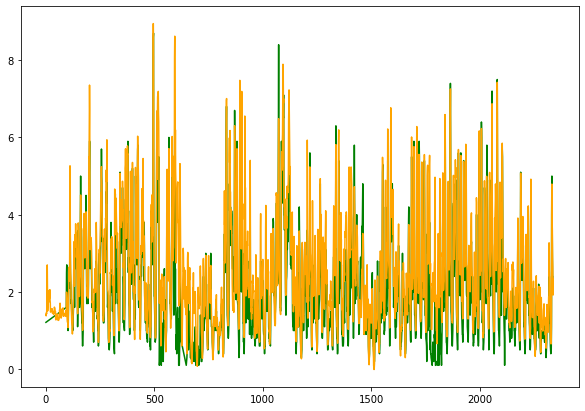

In [81]:
plt.figure(figsize=(10,7))
plt.plot(y_test.values, color='green')
plt.plot(y_pred, color='orange')
# plt.ylabel('CO(GT)')
# plt.title('Actual vs Predicted Temperature [Test set]')
# plt.legend(['Actual', 'Predicted'])
# plt.show()

In [82]:
y_pred

array([1.40917321, 1.3811311 , 1.45969438, ..., 2.62434356, 1.91902145,
       2.32464863])

In [83]:
# sns.pairplot(df[df.columns[0:12]])